In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [253]:
data = pd.read_csv('data/crime_by_district.csv')
data.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [254]:
data = data[data['DISTRICT'] != 'TOTAL']

In [255]:
assault_by_district = data.groupby('DISTRICT')['Assault on women'].count().to_frame().reset_index().sort_values(by='Assault on women', ascending = False)

In [256]:
lowest_crime_rate_districts = assault_by_district[assault_by_district['Assault on women'] == 1]['DISTRICT'].tolist()

In [257]:
print('District which has the most crime rates in India is: G.R.P.\n')
print(f'Districts which has the lowest crime rates in India are :\n{lowest_crime_rate_districts}')

District which has the most crime rates in India is: G.R.P.

Districts which has the lowest crime rates in India are :
['A and N ISLANDS', 'VILUPPURAM', 'AGAR', 'AMETHI', 'DISCOM', 'RAILWAYSKMR', 'AMROHA', 'I&P HARYANA', 'LONGDING', 'GUMALA', 'S.T.F.', 'C.B.KASHMIR', 'SAMBHAL', 'MAHENDERGARH', 'HAPUR', 'N.C. HILLS', 'SHAMLI', 'D&N HAVELI', 'GARO HILLS SOUTH W.', 'HISAR', 'GARO HILLS NORTH', 'KHASI HILLS SOUTH W.', 'G.R.P. AJMER', 'I.G.I.AIRPORT', 'RAILWAYS KMR', 'SPL NARCOTIC', 'METRO RAIL', 'NORTH WEST', 'NORTH EAST', 'MIDNAPUR', 'KASGANJ', 'JAINTIA HILLS EAST', 'JAINTIA HILLS WEST', 'G.R.P.(RLY)', 'TRAFFIC PS', 'G.R.P. JODHPUR', 'SOUTH WEST']


**DATA CLEANING**

In [258]:
# data of same cities merged which was different due to
# CASE discrepency (Like "DELHI" and "delhi")
data['STATE/UT'] = data['STATE/UT'].str.upper() 
data['DISTRICT'] = data['DISTRICT'].str.upper() 
data.loc[ data["STATE/UT"] == "DELHI UT","STATE/UT"] = "DELHI"
data.loc[ data["STATE/UT"] == "A&N ISLANDS","STATE/UT"] = "A & N ISLANDS"
data.loc[ data["STATE/UT"] == "D&N HAVELI","STATE/UT"] = "D & N HAVELI"
data.head() # Cleaned Data

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


**DATA VISUALISATION**

In [259]:
data['Total Crimes']  = data.sum(axis=1, numeric_only=True)
data["Year"] = data["Year"].astype(int)
data["Total Crimes"] = data["Total Crimes"].astype(int)
data["Total Crimes"] = data['Total Crimes'] - data['Year']
data["Year"] = data["Year"].astype(int)

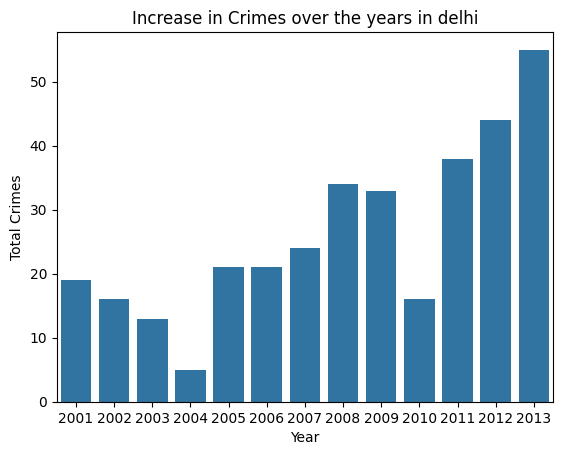

In [260]:
try:
    State = input("Input State to be analysed")
    State = State.upper()
    state_df = data[data["STATE/UT"] == State]
    state_df.head()
    result = state_df.groupby("Year")["Total Crimes"].sum()
    Yearly_Crimes = {}
    for year, records in result.items():
        Yearly_Crimes[year] = records
    Yearly_Crimes = pd.DataFrame({'Year' : Yearly_Crimes.keys() , 'Total Crimes' : Yearly_Crimes.values()})
    base_color = sb.color_palette()[0]
    sb.barplot(x = "Year",y = "Total Crimes",data = Yearly_Crimes,color = base_color)
    plt.title("Increase in Crimes over the years in {state}".format(state = State.lower()))
except:
    print("State Not Found")